#### Fahad Vadakkumpadath
2/92020

In [36]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np

In [37]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_test = pd.read_csv("test.csv")
#transpose
titanic_test.head().T
#note their is no Survived column here which is our target varible we are trying to predict

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [39]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
#lets see if there are any more columns with missing values 
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
#how about test set??
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

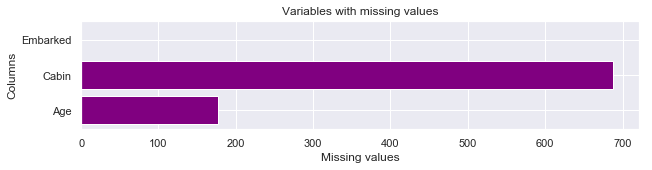

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

labels = []
counts =[]
for col in null_columns:
    labels.append(col)
    counts.append(titanic[col].isnull().sum())
ind = np.arange(len(labels))
fig,ax = plt.subplots(figsize=(10,2))
ax.barh(ind,counts,color='purple')
#ax.axis('off')
ax.set_yticks(ind)
ax.set_yticklabels(labels)
ax.set_xlabel('Missing values')
ax.set_ylabel('Columns')
ax.set_title('Variables with missing values')

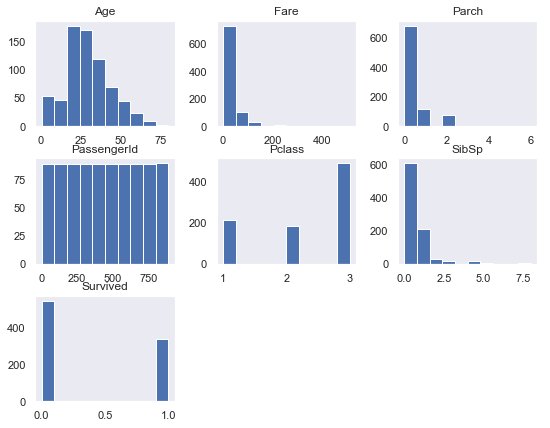

In [99]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

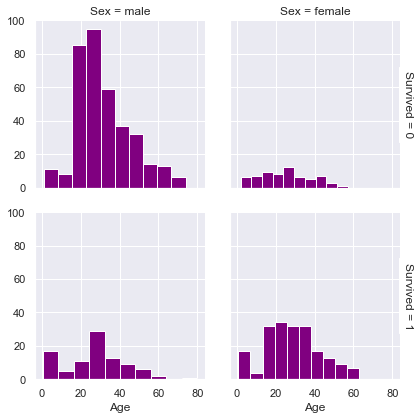

In [108]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

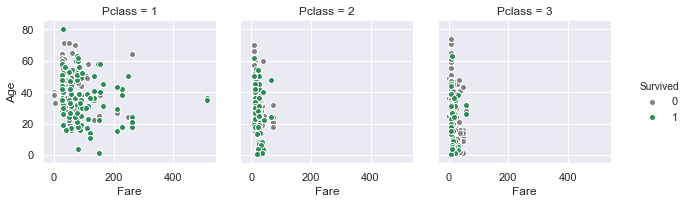

In [44]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

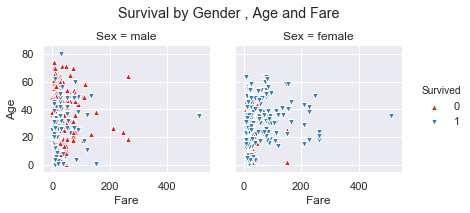

In [45]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


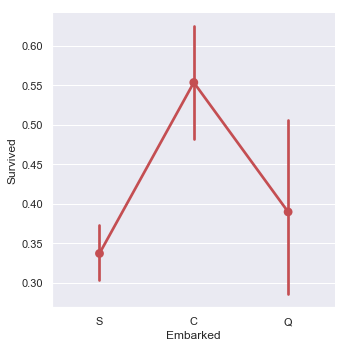

In [115]:
sns.factorplot(x = 'Embarked',y="Survived", data = titanic,color="r");

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


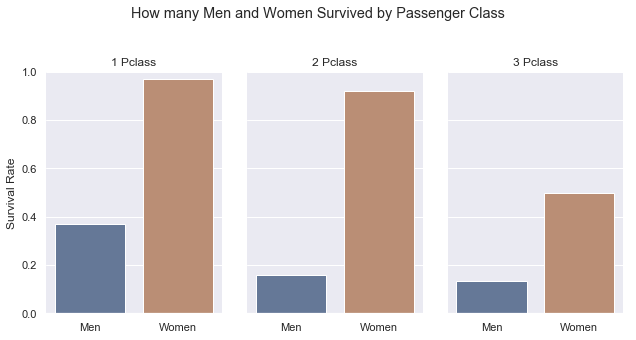

In [46]:
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

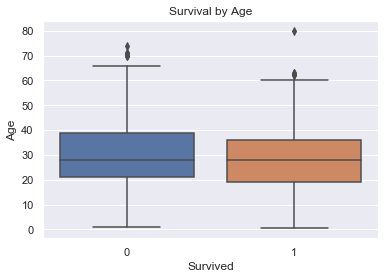

In [48]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)

plt.title("Survival by Age",fontsize=12);

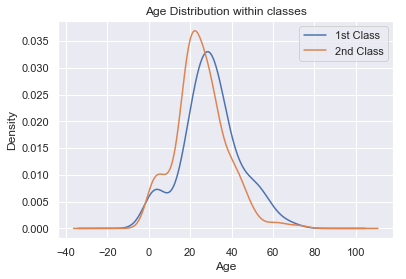

In [49]:
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

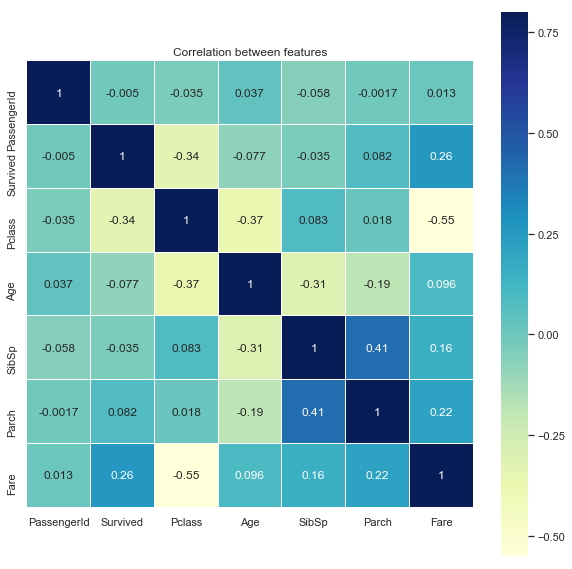

In [50]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [52]:
#correlation of features with target variable
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [53]:
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


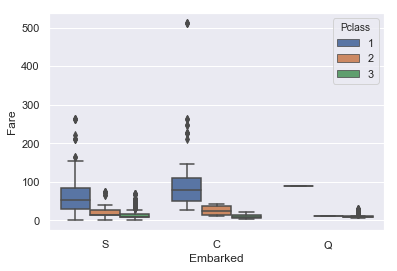

In [55]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);

In [56]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')

In [57]:
#there is an empty fare column in test set
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [58]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [59]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)